# Image Classification Project

Dataset we'll use:

[CIFAR 10 DATASET](http://www.cs.toronto.edu/~kriz/cifar.html#:~:text=The%20CIFAR%2D10%20dataset,batch%2C%20each%20with%2010000%20images.)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## Import Libraries

In [25]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

In [26]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

## Load Dataset

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 253s 1us/step


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

### Reshape y samples

In [12]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
def showImage(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(y_classes[y[index]])

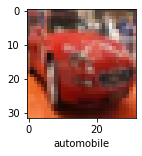

In [15]:
showImage(X_train, y_train, 5)

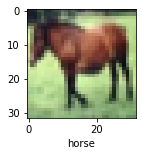

In [19]:
showImage(X_train, y_train, 7)

In [20]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Normalize Dataset

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Build Model

In [27]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [28]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

2022-06-14 18:31:00.720236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-14 18:31:00.745806: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz


Epoch 1/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.7211 - accuracy: 0.3695 - val_loss: 1.2111 - val_accuracy: 0.5736
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1531 - accuracy: 0.5961 - val_loss: 1.0415 - val_accuracy: 0.6321
Epoch 3/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9850 - accuracy: 0.6599 - val_loss: 1.0402 - val_accuracy: 0.6396
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8892 - accuracy: 0.6879 - val_loss: 0.9428 - val_accuracy: 0.6741
Epoch 5/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8208 - accuracy: 0.7201 - val_loss: 0.9317 - val_accuracy: 0.6774


## Make Predictions

In [65]:
y_test = y_test.reshape(-1,)

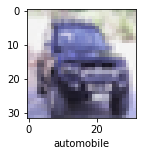

In [61]:
showImage(X_test, y_test, 9)

In [35]:
y_predictions = model.predict(X_test)

In [37]:
y_predictions[9]

array([8.1424601e-02, 8.7217128e-01, 4.1019721e-03, 7.4181543e-04,
       8.4522564e-04, 2.5544484e-04, 9.8768985e-03, 1.1056328e-04,
       4.6727769e-03, 2.5799429e-02], dtype=float32)

In [39]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [41]:
y_classes[y_predictions[9]]

'automobile'

## Model Evaluations

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.57      0.86      0.68      1000
           1       0.77      0.82      0.79      1000
           2       0.54      0.58      0.56      1000
           3       0.56      0.41      0.47      1000
           4       0.72      0.53      0.61      1000
           5       0.62      0.55      0.58      1000
           6       0.65      0.85      0.74      1000
           7       0.77      0.73      0.75      1000
           8       0.86      0.71      0.77      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test, y_predictions)

In [48]:
cm

array([[857,  19,  33,  11,   8,   1,  17,   8,  29,  17],
       [ 44, 819,   6,   3,   3,   5,  11,   3,  21,  85],
       [125,  10, 578,  39,  50,  56,  94,  32,   7,   9],
       [ 65,  19,  99, 409,  45, 161, 132,  34,  19,  17],
       [ 59,   7, 125,  50, 529,  26, 111,  78,   8,   7],
       [ 45,  10, 104, 138,  32, 547,  56,  50,  10,   8],
       [ 18,   7,  45,  37,  15,  17, 848,   7,   3,   3],
       [ 39,   3,  60,  24,  45,  55,  16, 735,   4,  19],
       [176,  59,  21,   3,   2,   4,   7,   2, 706,  20],
       [ 75, 110,   8,  10,   5,   4,  15,   9,  18, 746]])

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

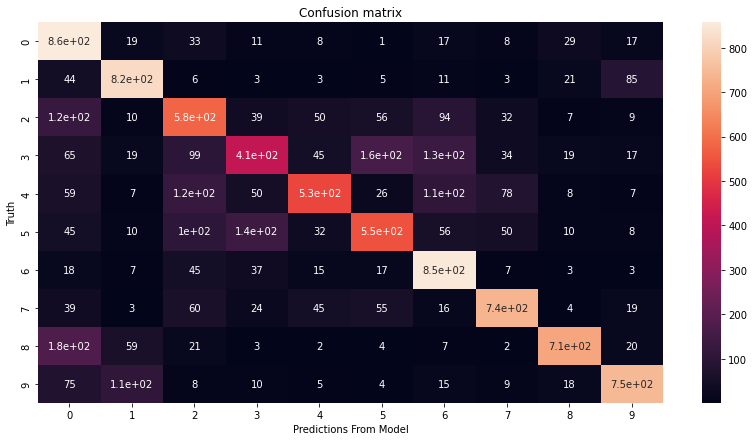

In [58]:
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions From Model")
plt.title("Confusion matrix")
plt.show()